In [235]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from warnings import filterwarnings
filterwarnings(action='ignore')

In [236]:
train=pd.read_csv('termdeposit_train.csv')
test=pd.read_csv('termdeposit_test.csv')

In [237]:
train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [238]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [239]:
train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# Feature Engineering

In [240]:
train.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [241]:
train.info

<bound method DataFrame.info of           ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    conta

In [242]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [243]:
train.isna().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [244]:
train.duplicated().sum()

0

In [245]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [246]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [247]:
test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [248]:
test.isna().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [249]:
test.keys()

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [250]:
test.duplicated().sum()

0

In [251]:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [252]:
test.shape

(13564, 17)

In [253]:
train.shape

(31647, 18)

In [254]:
train['age'].value_counts()

32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

In [255]:
train['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [256]:
train['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [257]:
train['job'].value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

In [258]:
train.skew()

ID           0.005851
age          0.681607
balance      7.995696
day          0.087185
duration     3.199766
campaign     4.873935
pdays        2.642374
previous    49.302348
dtype: float64

In [259]:
#removing outliers
from scipy.stats import zscore
z=np.abs(zscore(train))
z

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [260]:
threshold=3
print(np.where(z>3))

(array([   10,    21,    26, ..., 31622, 31645, 31646], dtype=int64), array([ 4, 10,  5, ..., 11, 12,  9], dtype=int64))


In [261]:
train_new=train[(z<3).all(axis=1)]

In [262]:
train.shape

(31647, 18)

In [263]:
train_new.shape

(27584, 18)

In [264]:
train=train_new
train.shape

(27584, 18)

# Dropping the columns

In [265]:
train=train.drop(columns='contact',axis=1)
train=train.drop(columns='job',axis=1)
train=train.drop(columns='month',axis=1)
train=train.drop(columns='poutcome',axis=1)
train=train.drop(columns='pdays',axis=1)


In [266]:
train

,ID,age,marital,education,default,balance,housing,loan,day,duration,campaign,previous,subscribed
0,26110,56,married,unknown,no,1933,no,no,19,44,2,0,no
1,40576,31,married,secondary,no,3,no,no,20,91,2,0,no
2,15320,27,married,secondary,no,891,yes,no,18,240,1,0,no
3,43962,57,divorced,tertiary,no,3287,no,no,22,867,1,3,yes
4,29842,31,married,secondary,no,119,yes,no,4,380,1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,single,secondary,no,2968,no,no,20,30,4,0,no
31641,9476,37,single,tertiary,no,1309,no,no,6,442,2,0,no
31642,36483,29,single,tertiary,no,0,yes,no,12,116,2,0,no
31643,40178,53,divorced,tertiary,no,380,no,yes,5,438,2,0,yes


# Replacing the string values into integer values

In [267]:
train.replace({'marital':{'married':0,'divorced':1,'single':2},'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},'default':{'yes':0,'no':1},'housing':{'yes':0,'no':1},'loan':{'yes':0,'no':1},'subscribed':{'yes':0,'no':1}},inplace=True)

In [268]:
train

,ID,age,marital,education,default,balance,housing,loan,day,duration,campaign,previous,subscribed
0,26110,56,0,3,1,1933,1,1,19,44,2,0,1
1,40576,31,0,0,1,3,1,1,20,91,2,0,1
2,15320,27,0,0,1,891,0,1,18,240,1,0,1
3,43962,57,1,1,1,3287,1,1,22,867,1,3,0
4,29842,31,0,0,1,119,0,1,4,380,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,12109,43,2,0,1,2968,1,1,20,30,4,0,1
31641,9476,37,2,1,1,1309,1,1,6,442,2,0,1
31642,36483,29,2,1,1,0,0,1,12,116,2,0,1
31643,40178,53,1,1,1,380,1,0,5,438,2,0,0


In [269]:
train.corr()

,ID,age,marital,education,default,balance,housing,loan,day,duration,campaign,previous,subscribed
ID,1.000000,-0.034078,0.102734,-0.008508,NaN,0.095436,0.205183,0.076859,-0.049406,0.013162,-0.087555,0.371752,-0.314671
age,-0.034078,1.000000,-0.385653,0.154952,NaN,0.093209,0.155100,-0.005722,-0.010067,-0.026249,0.035203,0.007490,0.006545
marital,0.102734,-0.385653,1.000000,-0.069173,NaN,-0.012989,0.032389,0.051561,-0.003403,0.024471,-0.049278,0.017647,-0.073047
education,-0.008508,0.154952,-0.069173,1.000000,NaN,0.047726,0.065790,0.067440,-0.010902,-0.006592,0.011409,-0.012631,-0.008220
default,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,0.095436,0.093209,-0.012989,0.047726,NaN,1.000000,0.057183,0.094902,0.009251,0.032218,-0.014114,0.050004,-0.070139
housing,0.205183,0.155100,0.032389,0.065790,NaN,0.057183,1.000000,0.037213,0.013201,-0.011401,0.040230,-0.007770,-0.149084
loan,0.076859,-0.005722,0.051561,0.067440,NaN,0.094902,0.037213,1.000000,-0.011915,0.010625,0.002137,0.015061,-0.075136
day,-0.049406,-0.010067,-0.003403,-0.010902,NaN,0.009251,0.013201,-0.011915,1.000000,-0.026854,0.131437,-0.049713,0.029537
duration,0.013162,-0.026249,0.024471,-0.006592,NaN,0.032218,-0.011401,0.010625,-0.026854,1.000000,-0.071611,0.014970,-0.352371


In [270]:
X=train.drop(columns=['subscribed'],axis=1)

In [271]:
print(X)

          ID  age  marital  education  default  balance  housing  loan  day  \
0      26110   56        0          3        1     1933        1     1   19   
1      40576   31        0          0        1        3        1     1   20   
2      15320   27        0          0        1      891        0     1   18   
3      43962   57        1          1        1     3287        1     1   22   
4      29842   31        0          0        1      119        0     1    4   
...      ...  ...      ...        ...      ...      ...      ...   ...  ...   
31640  12109   43        2          0        1     2968        1     1   20   
31641   9476   37        2          1        1     1309        1     1    6   
31642  36483   29        2          1        1        0        0     1   12   
31643  40178   53        1          1        1      380        1     0    5   
31644  19710   32        2          1        1      312        1     1    7   

       duration  campaign  previous  
0            

In [272]:
Y=train['subscribed']

In [273]:
print(Y)

0        1
1        1
2        1
3        0
4        1
        ..
31640    1
31641    1
31642    1
31643    0
31644    1
Name: subscribed, Length: 27584, dtype: int64


# Data Visualization

# Correlation

<Axes: >

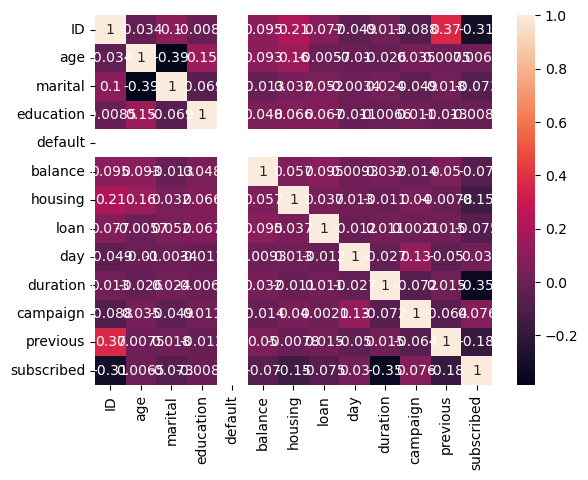

In [274]:
corr_hmap = train.corr()
sns.heatmap(corr_hmap,annot=True)


# Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

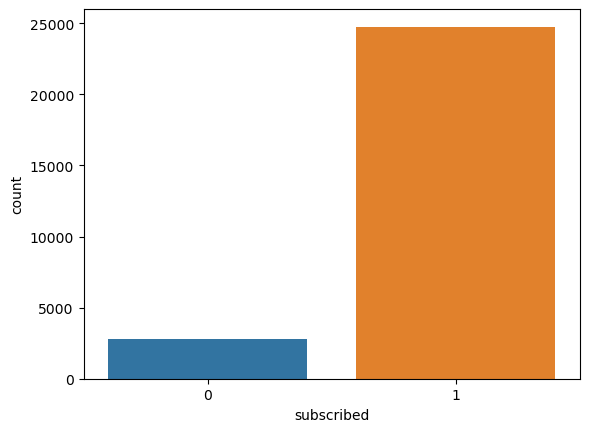

In [275]:

sns.countplot(x ='subscribed', data = train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

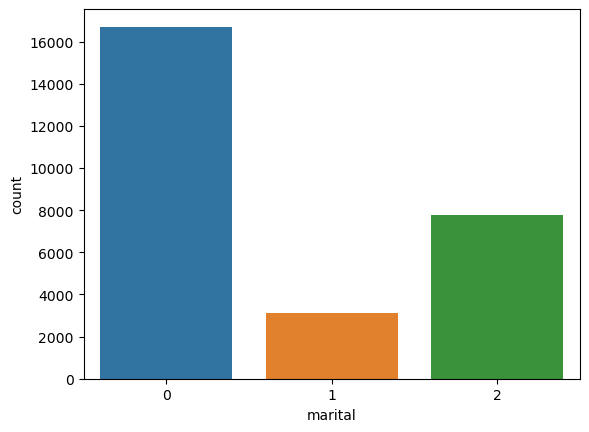

In [276]:

sns.countplot(x ='marital', data = train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

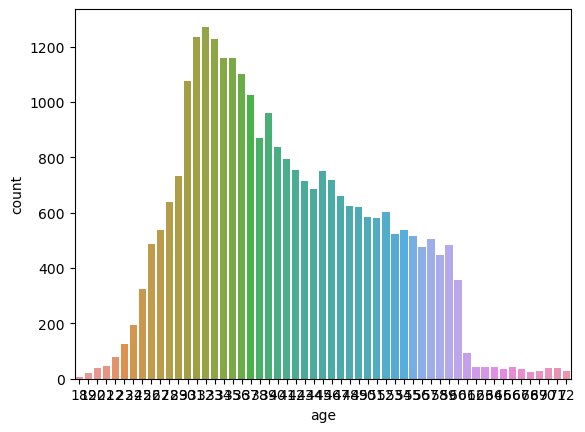

In [277]:

sns.countplot(x ='age', data = train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

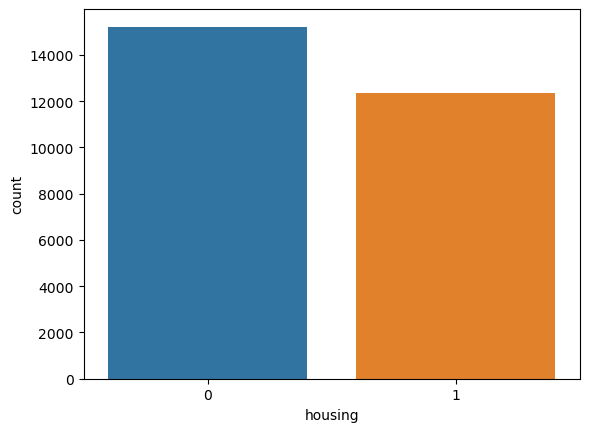

In [278]:

sns.countplot(x ='housing', data = train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

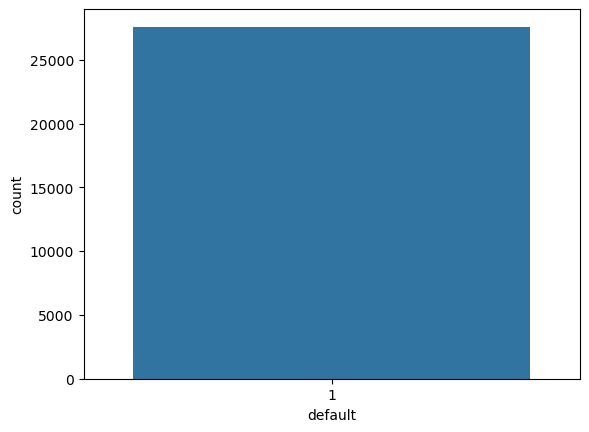

In [279]:

sns.countplot(x ='default', data = train)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

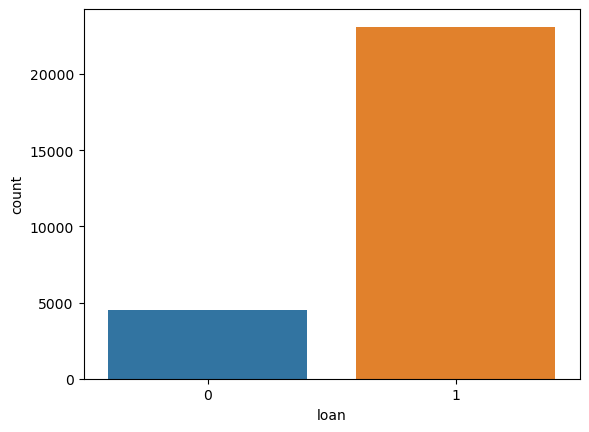

In [280]:

sns.countplot(x ='loan', data = train)
plt.show

# Distplot

<function matplotlib.pyplot.show(close=None, block=None)>

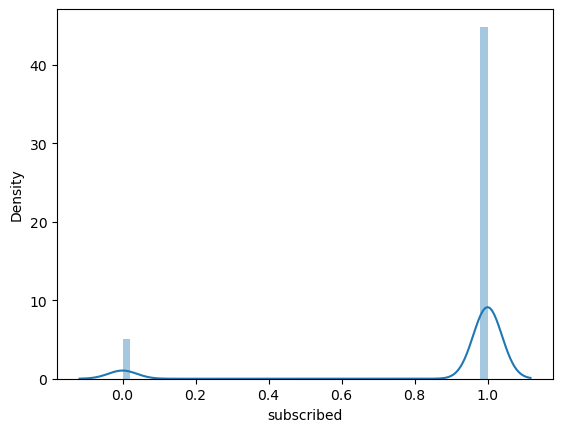

In [281]:
sns.distplot(train['subscribed'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

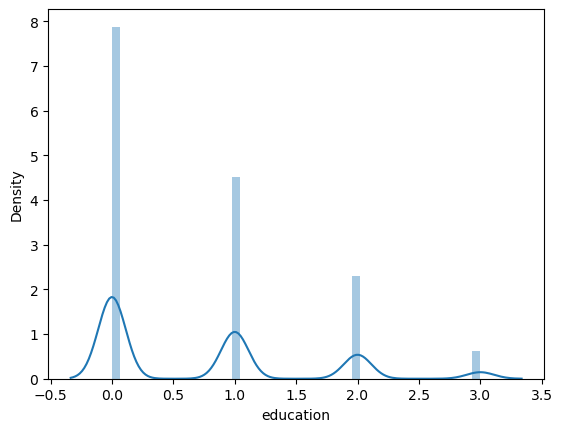

In [282]:
sns.distplot(train['education'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

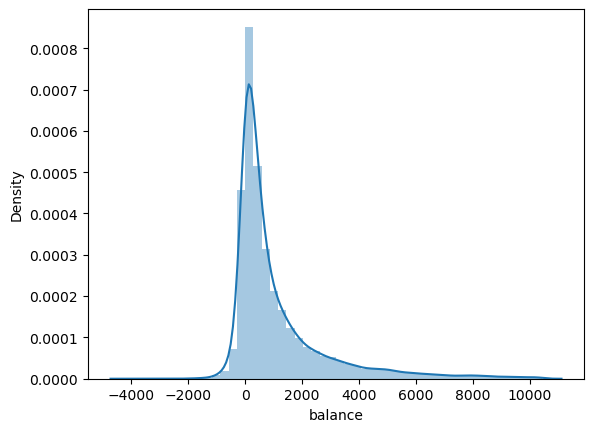

In [283]:
sns.distplot(train['balance'])
plt.show

# Barplot

<Axes: xlabel='subscribed', ylabel='education'>

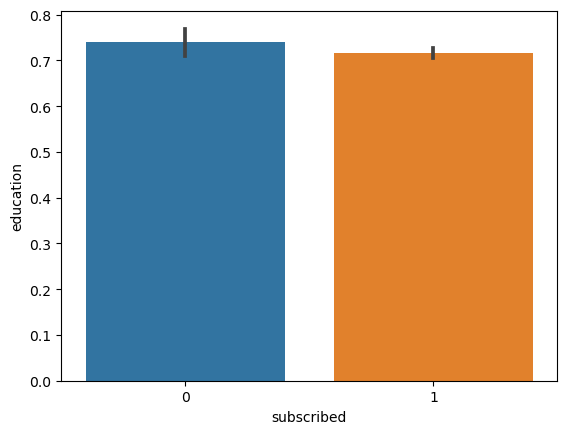

In [284]:
sns.barplot(x='subscribed',y='education',data=train)

<Axes: xlabel='housing', ylabel='loan'>

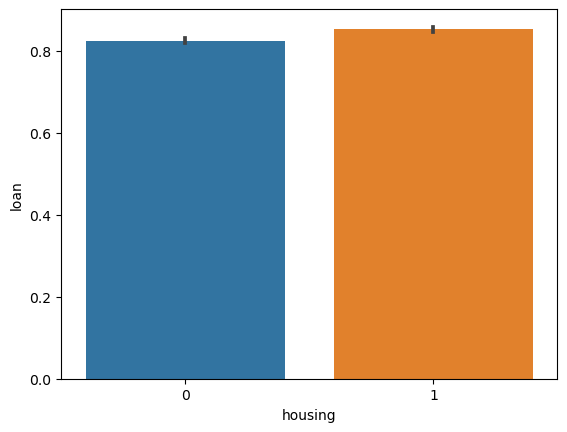

In [285]:
sns.barplot(x='housing',y='loan',data=train)

<Axes: xlabel='loan', ylabel='default'>

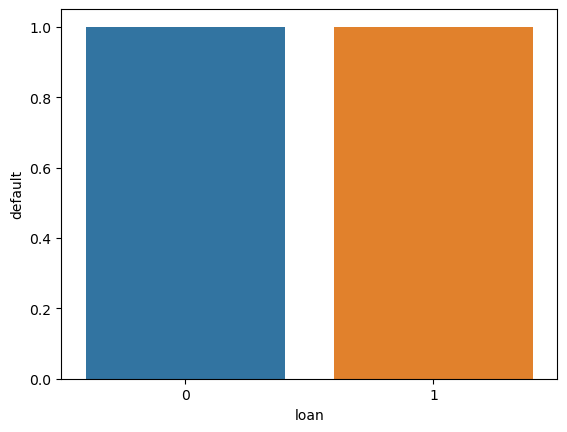

In [286]:
sns.barplot(x='loan',y='default',data=train)

# Violinplot

<Axes: xlabel='subscribed', ylabel='loan'>

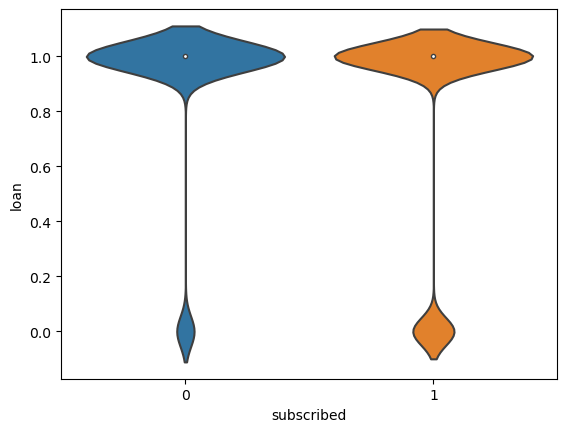

In [287]:
sns.violinplot(x='subscribed',y='loan',data=train)

<Axes: xlabel='default', ylabel='marital'>

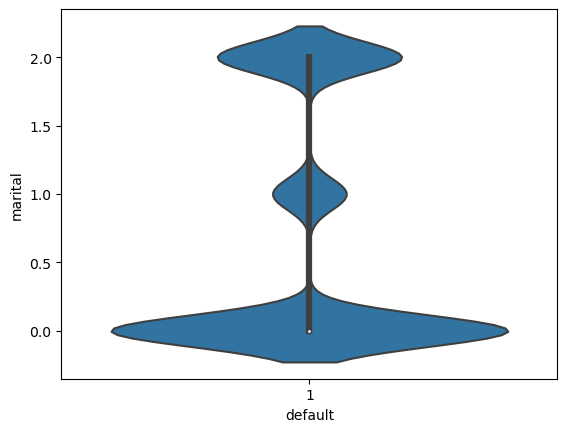

In [288]:
sns.violinplot(x='default',y='marital',data=train)

<Axes: xlabel='loan', ylabel='age'>

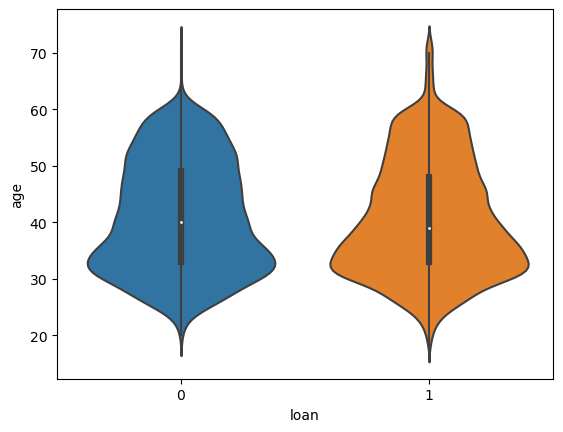

In [289]:
sns.violinplot(x='loan',y='age',data=train)

# Boxplot

ID               Axes(0.125,0.747241;0.133621x0.132759)
age           Axes(0.285345,0.747241;0.133621x0.132759)
marital        Axes(0.44569,0.747241;0.133621x0.132759)
education     Axes(0.606034,0.747241;0.133621x0.132759)
default       Axes(0.766379,0.747241;0.133621x0.132759)
balance          Axes(0.125,0.587931;0.133621x0.132759)
housing       Axes(0.285345,0.587931;0.133621x0.132759)
loan           Axes(0.44569,0.587931;0.133621x0.132759)
day           Axes(0.606034,0.587931;0.133621x0.132759)
duration      Axes(0.766379,0.587931;0.133621x0.132759)
campaign         Axes(0.125,0.428621;0.133621x0.132759)
previous      Axes(0.285345,0.428621;0.133621x0.132759)
subscribed     Axes(0.44569,0.428621;0.133621x0.132759)
dtype: object

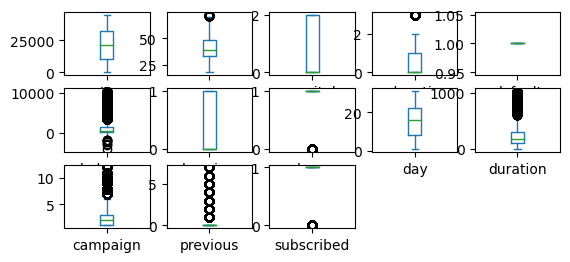

In [290]:
train.plot(kind='box',subplots=True,layout=(5,5))

# Histogram

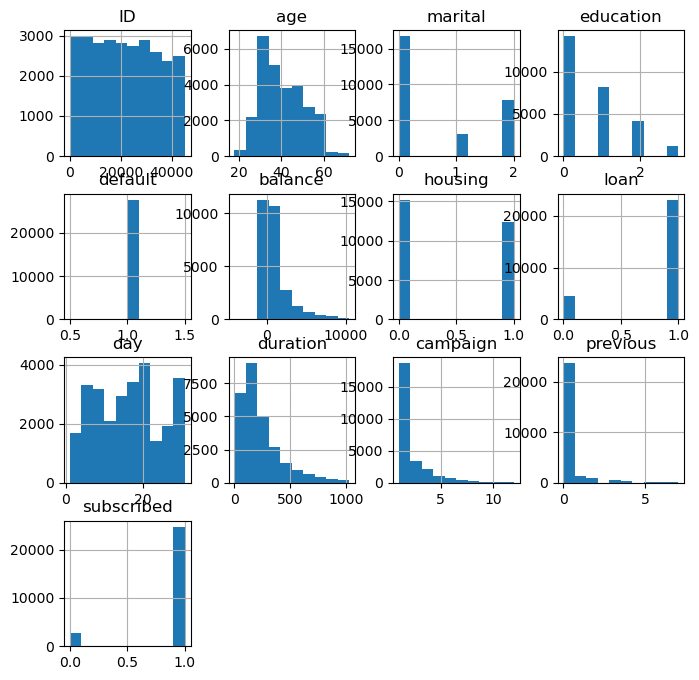

In [291]:
train.hist(figsize=(8,8),bins=10)
plt.show()

# Bivariate Analysis

# Scatter Plot

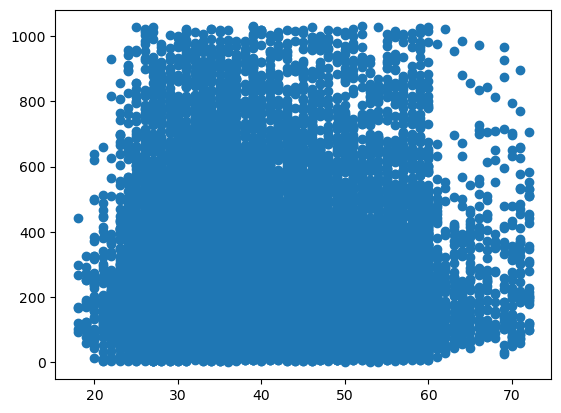

In [292]:
plt.scatter(train['age'],train['duration'])
plt.show()

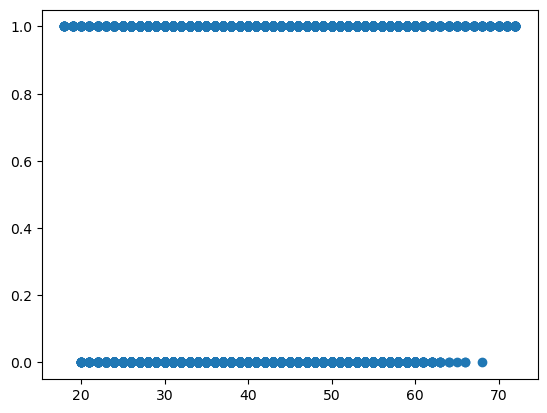

In [293]:
plt.scatter(train['age'],train['housing'])
plt.show()

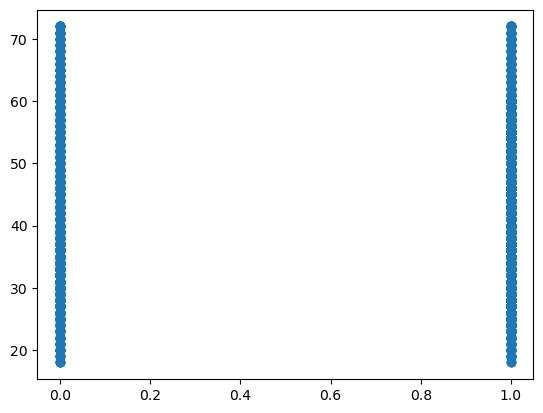

In [294]:
plt.scatter(train['subscribed'],train['age'])
plt.show()

# Pairplot

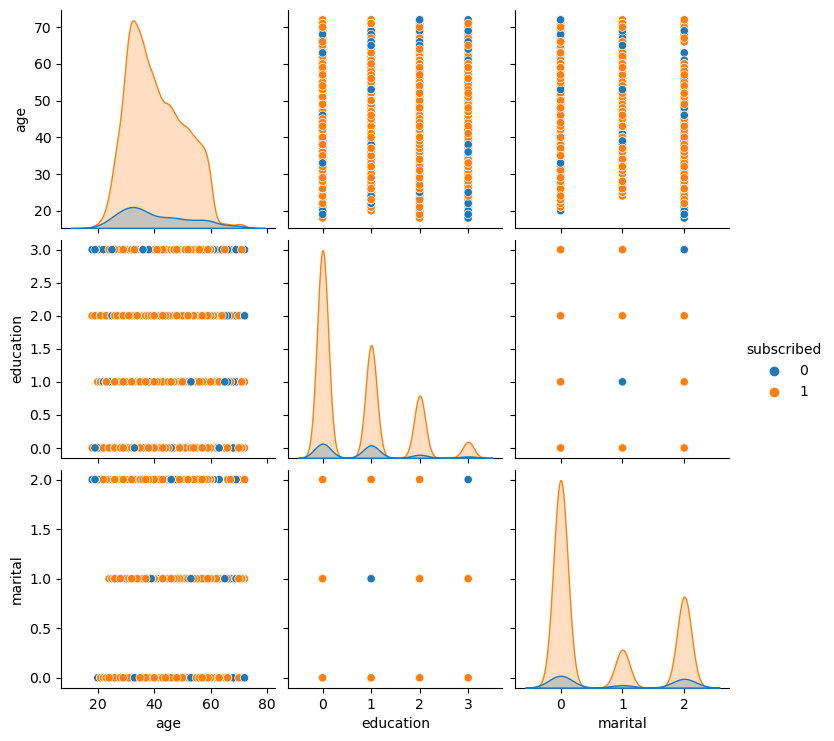

In [295]:
sns.pairplot(data=train,hue='subscribed',vars=['age','education','marital'])

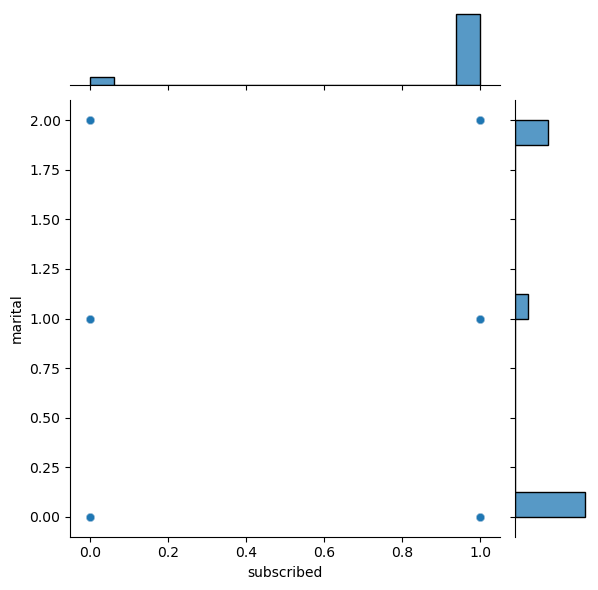

In [350]:
from scipy.stats import pearsonr
sns.jointplot(x='subscribed', y='marital', data=train, alpha = 0.1)

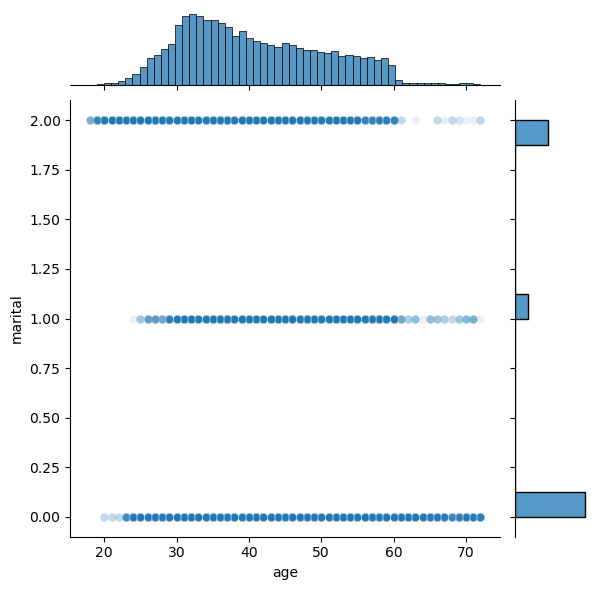

In [351]:
from scipy.stats import pearsonr
sns.jointplot(x='age', y='marital', data=train, alpha = 0.1)

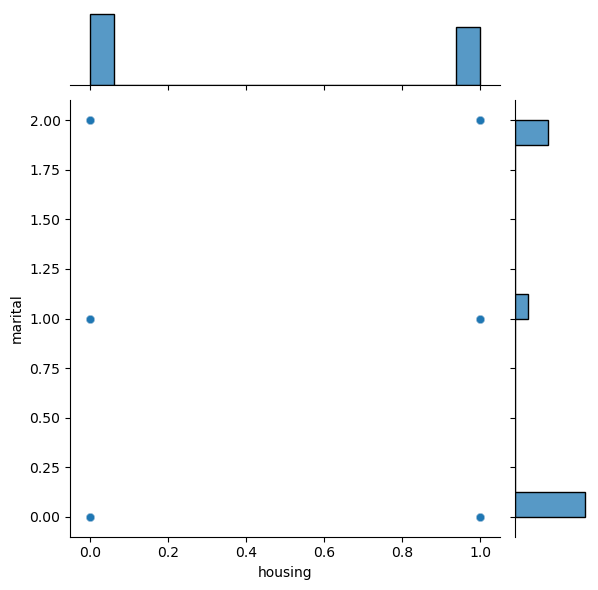

In [352]:
from scipy.stats import pearsonr
sns.jointplot(x='housing', y='marital', data=train, alpha = 0.1)

# Training the model

In [296]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [297]:
X_train.shape

(19308, 12)

In [298]:
Y_train.shape

(19308,)

In [299]:
X_test.shape

(8276, 12)

In [300]:
Y_test.shape

(8276,)

In [301]:
#logistic regression
lg=LogisticRegression()

In [302]:
#training the model
lg.fit(X_train,Y_train)

LogisticRegression()

In [303]:
#testing the model
pred=lg.predict(X_test)

In [304]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [305]:
accuracy_score(Y_test,pred)

0.8986225229579508

In [306]:
print(confusion_matrix(Y_test,pred))

[[ 172  678]
 [ 161 7265]]


<Axes: >

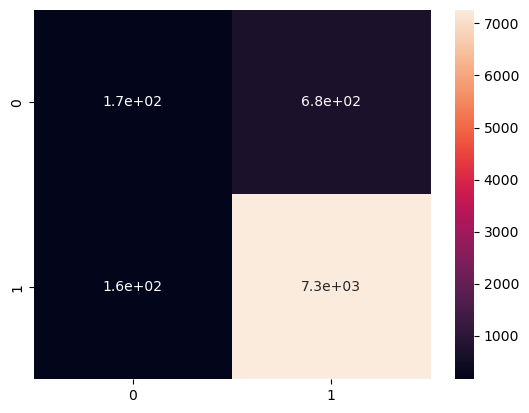

In [307]:
c=confusion_matrix(Y_test,pred)
sns.heatmap(c,annot=True)

In [308]:
def trainpred(p):
    p=p.reshape(1,-1)
    pred=lg.predict(p)
    print('predicted value:',pred)
    if pred==1:
        print('Subscribed')
    else:
        print('Not Subscribed')

In [309]:
p=np.array([19710,32,2,1,1,312,1,1,7,37,3,0])
trainpred(p)

predicted value: [1]
Subscribed


In [311]:

dtc=DecisionTreeClassifier()

In [312]:
#training the model
dtc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [313]:
#testing the model
pred=lg.predict(X_test)

In [314]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [315]:
accuracy_score(Y_test,pred)

0.8986225229579508

In [316]:
print(confusion_matrix(Y_test,pred))

[[ 172  678]
 [ 161 7265]]


<Axes: >

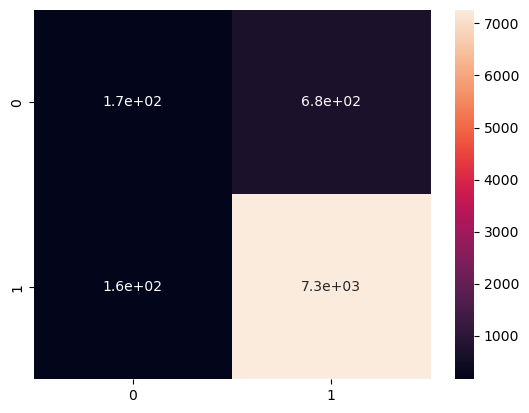

In [317]:
c=confusion_matrix(Y_test,pred)
sns.heatmap(c,annot=True)

In [320]:
knn=KNeighborsClassifier()

In [321]:
#training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [322]:
#testing the model
pred=lg.predict(X_test)

In [328]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [324]:
accuracy_score(Y_test,pred)

0.8986225229579508

In [325]:
print(confusion_matrix(Y_test,pred))

[[ 172  678]
 [ 161 7265]]


In [326]:
svc=SVC()

In [327]:
#training the model
svc.fit(X_train,Y_train)

SVC()

In [329]:
#testing the model
pred=lg.predict(X_test)

In [330]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [331]:
accuracy_score(Y_test,pred)

0.8986225229579508

In [332]:
print(confusion_matrix(Y_test,pred))

[[ 172  678]
 [ 161 7265]]


In [333]:
rfc=RandomForestClassifier()

In [334]:
#training the model
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [335]:
#testing the model
pred=lg.predict(X_test)

In [336]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [337]:
accuracy_score(Y_test,pred)

0.8986225229579508

In [338]:
print(confusion_matrix(Y_test,pred))

[[ 172  678]
 [ 161 7265]]


In [340]:
test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [341]:
test=test.drop(columns='contact',axis=1)
test=test.drop(columns='job',axis=1)
test=test.drop(columns='month',axis=1)
test=test.drop(columns='poutcome',axis=1)
test=test.drop(columns='pdays',axis=1)

In [342]:
test.replace({'marital':{'married':0,'divorced':1,'single':2},'education':{'secondary':0,'tertiary':1,'primary':2,'unknown':3},'default':{'yes':0,'no':1},'housing':{'yes':0,'no':1},'loan':{'yes':0,'no':1},'subscribed':{'yes':0,'no':1}},inplace=True)

In [343]:
test

,ID,age,marital,education,default,balance,housing,loan,day,duration,campaign,previous
0,38441,32,0,0,1,118,0,1,15,20,6,0
1,40403,78,1,2,1,2787,1,1,1,372,1,0
2,3709,31,2,1,1,144,0,1,16,676,1,0
3,37422,57,2,2,1,3777,0,1,13,65,2,0
4,12527,45,1,0,1,-705,1,0,3,111,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,0,1,1,45,1,1,28,148,4,0
13560,11743,54,0,2,1,2281,0,1,20,158,1,0
13561,28292,35,0,2,1,285,0,1,29,136,1,0
13562,45163,29,2,0,1,464,1,1,9,208,2,3


# predicting the test model

In [344]:
test_pred=dtc.predict(test)

In [345]:
test_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [348]:
test_pred=lg.predict(test)

In [349]:
test_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)